# "Human Learning" with iris data

Can you predict the species of an iris using petal and sepal measurements?

TASKS:
1. Read iris data into a pandas DataFrame, including column names.
2. Gather some basic information about the data.
3. Use groupby, sorting, and/or plotting to look for differences between species.
4. Come up with a set of rules that could be used to predict species based upon measurements.

BONUS: Define a function that accepts a row of data and returns a predicted species.
Then, use that function to make predictions for all existing rows of data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Task 1

In [ ]:
# read the iris data into a pandas DataFrame, including column names


In [3]:
df=pd.read_csv('iris.csv')

In [4]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [24]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [25]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [26]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [27]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [28]:
df.shape

(150, 5)

## Task 2

In [5]:
# gather basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Task 3

In [ ]:
# use groupby to look for differences between the species


In [29]:
import seaborn as sns

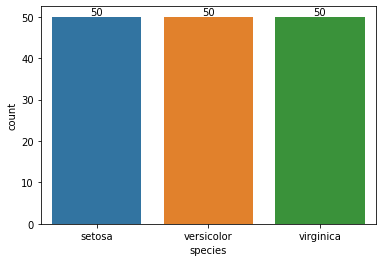

In [30]:
ax=sns.countplot(x=df["species"]);
ax.bar_label(ax.containers[0]);

In [12]:
df.groupby('species')

In [15]:
df_species=df.groupby('species').groups.keys()

In [31]:
# use sorting to look for differences between the species


In [32]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


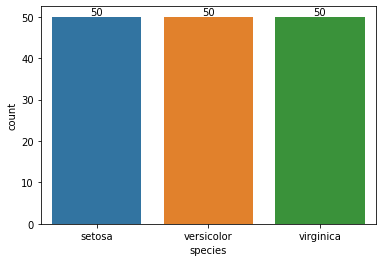

In [46]:
# use plotting to look for differences between the species
import seaborn as sns
 

In [33]:
# map species to a numeric value so that plots can be colored by category
df["species"]=df["species"].astype("category")

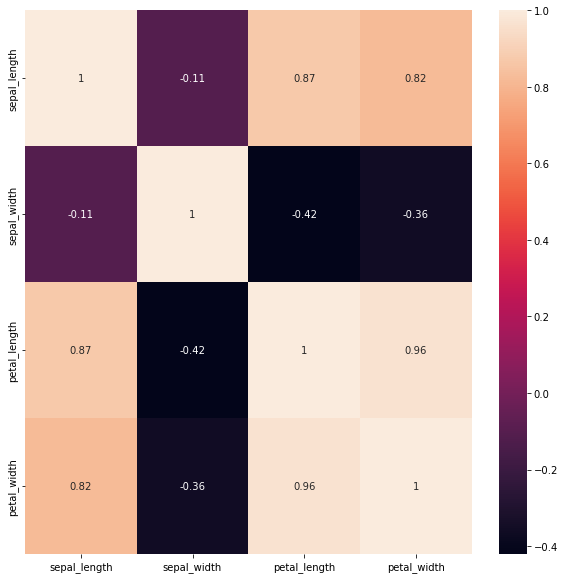

In [47]:
plt.figure(figsize=(10,10));
sns.heatmap(df.corr(), annot=True);

## Task 4

## Bonus

In [37]:
# define function that accepts a row of data and returns a predicted species
#Linear Regression için kullanılan tüm fonksiyonlar
def algo_test(x,y):
    G=GaussianNB()
    B=BernoulliNB()
    K=KNeighborsClassifier()
    L=LogisticRegression()()
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()()
    GBC=GradientBoostingClassifier()
    
    x_traing, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=13)
    
    algos=[G,B,K,L,D,R,GBC]
    algo_names=["GaussianNB","BernoulliNB","KNeighborsClassifier","LogisticRegression","DecisionTreeClassifier","RandomForestClassifier","GradientBoostingClassifier"]
    r_squared=[]
    rmse=[]
    mae=[]
    
    result = pd.DataFrame(columns=["accuracy_score","precision","recall","f1-score "],index=algo_names)
    
    for algo in algos:
        algo.fit(x_train, y_train)
        
        r_squared.append(r2_score(y_test,algo.predict(x_test)))
        rmse.append(mean_squared_error(y_test,algo.predict(x_test))**5)
        mae.append(mean_absolute_error(y_test, algo.predict(x_test)))
        
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
        return result.sort_values("R_Squared", ascending=False)
        
